Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best Parameters: {'max_depth': None, 'n_estimators': 100}
MSE: 1.0505969868344234
R-squared: 0.8557567992883967


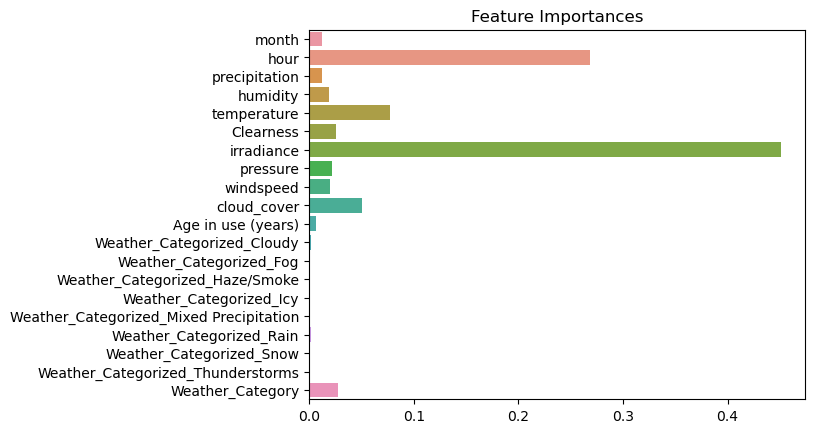

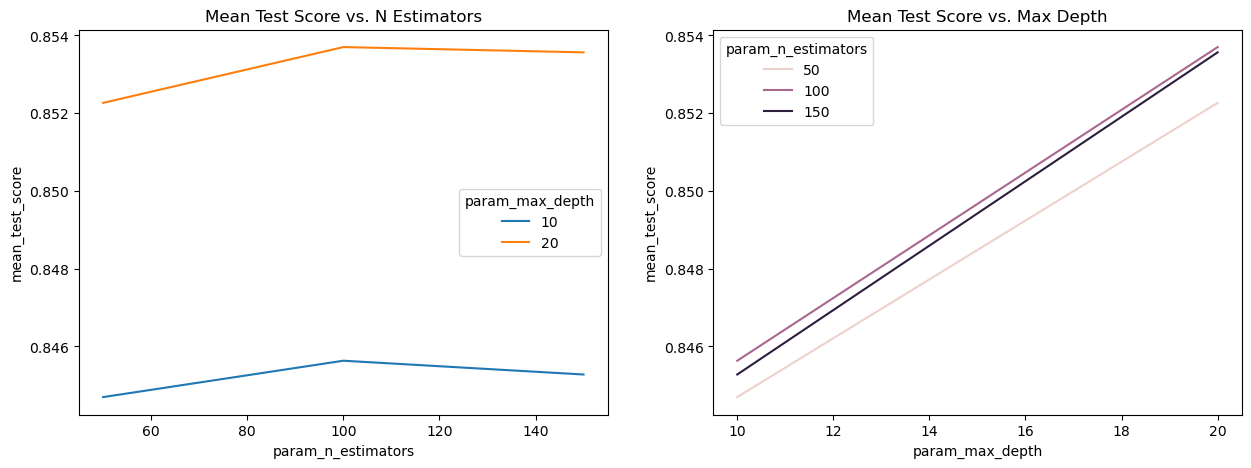

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('E:/UCL/EDAA/Solar_Energy_Production_v4.3RICHMOND.csv') 

X = data.drop('kWh', axis=1)
y = data['kWh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rf = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R-squared:', r2)

feature_importances = best_rf.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importances')
plt.show()

results = pd.DataFrame(grid_search.cv_results_)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=results, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', ax=ax[0])
sns.lineplot(data=results, x='param_max_depth', y='mean_test_score', hue='param_n_estimators', ax=ax[1])
ax[0].set_title('Mean Test Score vs. N Estimators')
ax[1].set_title('Mean Test Score vs. Max Depth')
plt.show()


Fitting 10 folds for each of 49 candidates, totalling 490 fits


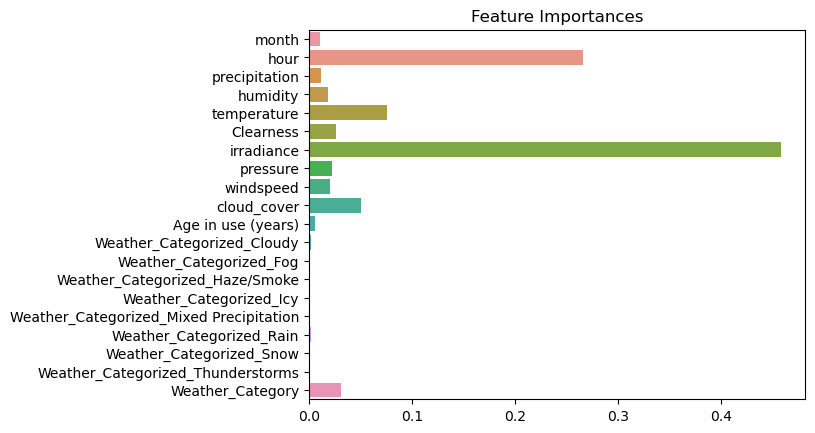

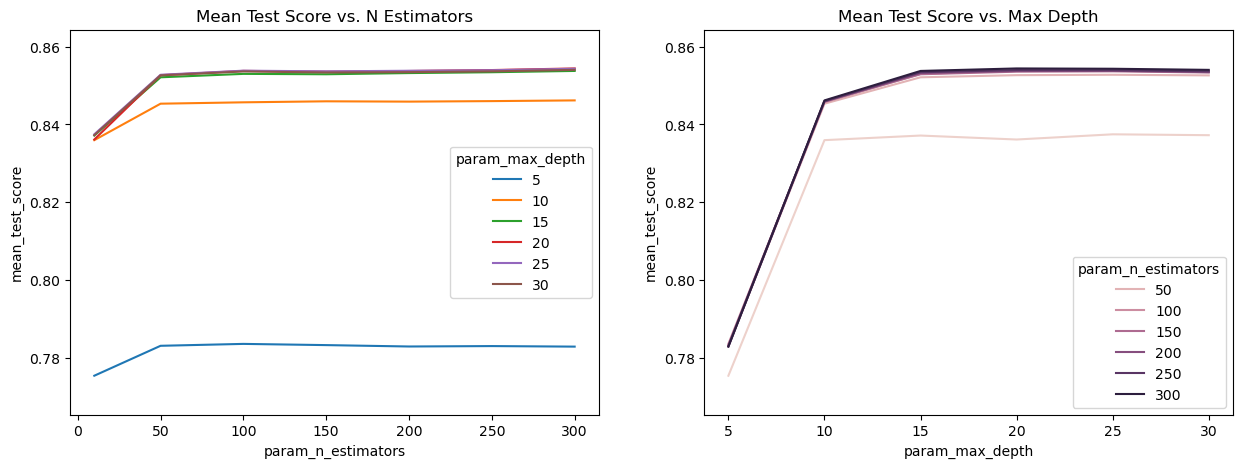

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('E:/UCL/EDAA/Solar_Energy_Production_v4.3RICHMOND.csv')  

X = data.drop('kWh', axis=1)
y = data['kWh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rf = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [10, 50, 100, 150, 200, 250, 300],
    'max_depth': [None, 5, 10, 15, 20, 25, 30]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

feature_importances = best_rf.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importances')
plt.show()

results = pd.DataFrame(grid_search.cv_results_)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=results, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', ax=ax[0])
sns.lineplot(data=results, x='param_max_depth', y='mean_test_score', hue='param_n_estimators', ax=ax[1])


ax[0].set_ylim(results['mean_test_score'].min() - 0.01, results['mean_test_score'].max() + 0.01)
ax[1].set_ylim(results['mean_test_score'].min() - 0.01, results['mean_test_score'].max() + 0.01)

ax[0].set_title('Mean Test Score vs. N Estimators')
ax[1].set_title('Mean Test Score vs. Max Depth')
plt.show()


In [8]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def normalized_root_mean_squared_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(mean_squared_error(y_true, y_pred)) / (np.max(y_true) - np.min(y_true))

scoring = {
    'r2': 'r2',
    'MSE': 'neg_mean_squared_error',
    'NMAE': 'neg_mean_absolute_error',
    'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False)
}

best_rf = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=1)
best_rf.fit(X_train, y_train)
scores = cross_validate(best_rf, X, y, scoring=scoring, cv=10, return_train_score=False)

r2_mean = scores['test_r2'].mean()
r2_std = scores['test_r2'].std()
mse_mean = -scores['test_MSE'].mean()
mse_std = scores['test_MSE'].std()
nrmse_mean = np.mean(np.sqrt(-scores['test_MSE']) / (np.max(y) - np.min(y)))
nmae_mean = -scores['test_NMAE'].mean()
mape_mean = -scores['test_MAPE'].mean()

print(f"R-squared Mean: {r2_mean}")
print(f"R-squared Std Dev: {r2_std}")
print(f"Mean MSE: {mse_mean}")
print(f"Std MSE: {mse_std}")
print(f"Mean NRMSE: {nrmse_mean}")
print(f"Mean NMAE: {nmae_mean}")
print(f"MAPE: {mape_mean}")


R-squared Mean: 0.7906238915990846
R-squared Std Dev: 0.09179842502398908
Mean MSE: 1.3880724491209768
Std MSE: 0.47916122826082125
Mean NRMSE: 0.12542560825303595
Mean NMAE: 0.771858673813308
MAPE: 677.8283230566482
